# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Sarah | Jasim | Sarah Jasim | 5 | 25% |
| Member 2: | Saba | Shabnam | Saba Shabnam | 5 | 25% |
| Member 3: | Kamsiyochukwu | Nnodu | Kamsy Nnodu | 5 | 25% |
| Member 4: | Christopher | Roberts | Christopher Roberts | 5 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

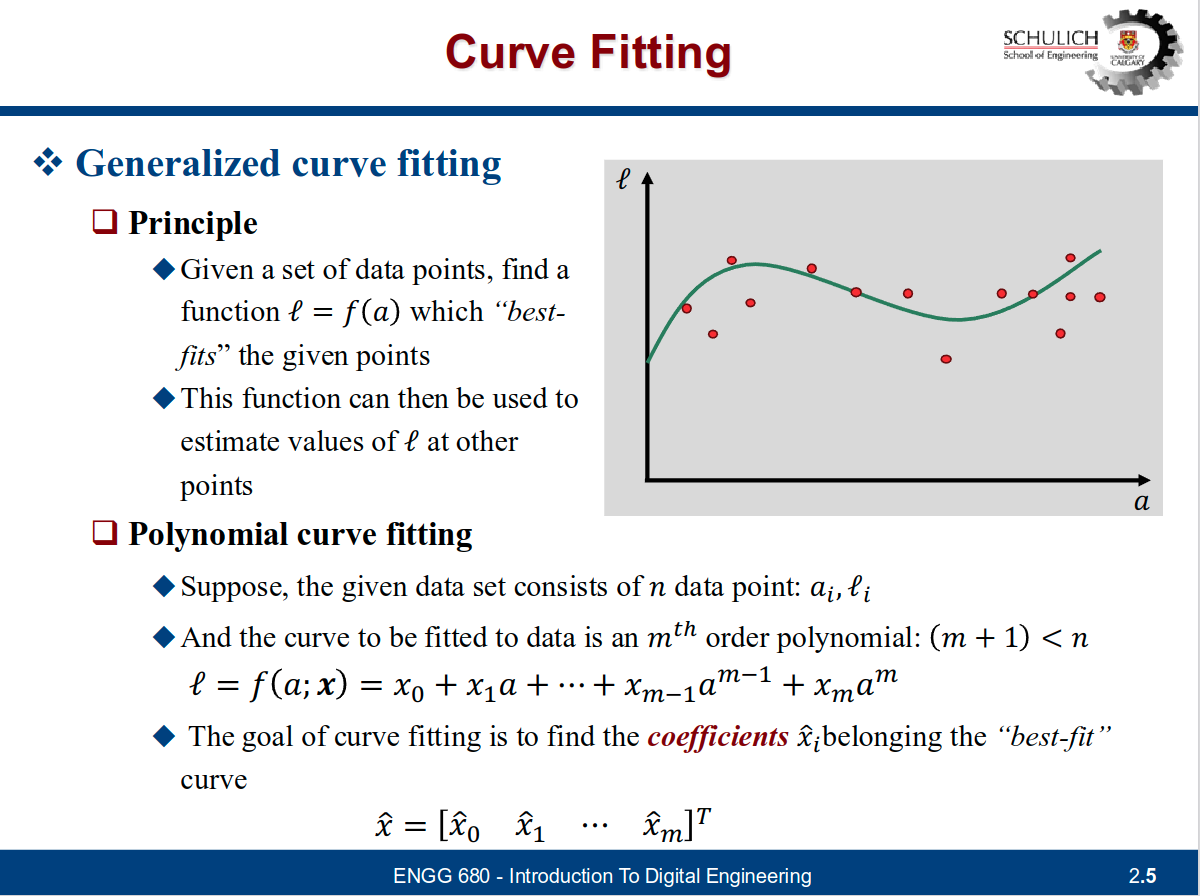

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)

df_data =pd.read_excel('./data.xlsx') #Loading data.xlsx file
arr_data = df_data.to_numpy() #converting to numpy array
#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)

l = np.array(df_data['l'])  # Noisy observations
l_var = np.array(df_data['l_var']) # Variance of observations
l_true = l_true = np.array(df_data['l_true'])  # True observations

In [3]:
# step 3
# define the number of observation n
# (1 mark)
 # Number of observations in the array
n= len(df_data)  #number of observations
print(n)  


# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n) #observation weight matrix P for LSE as identity matrix

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


500


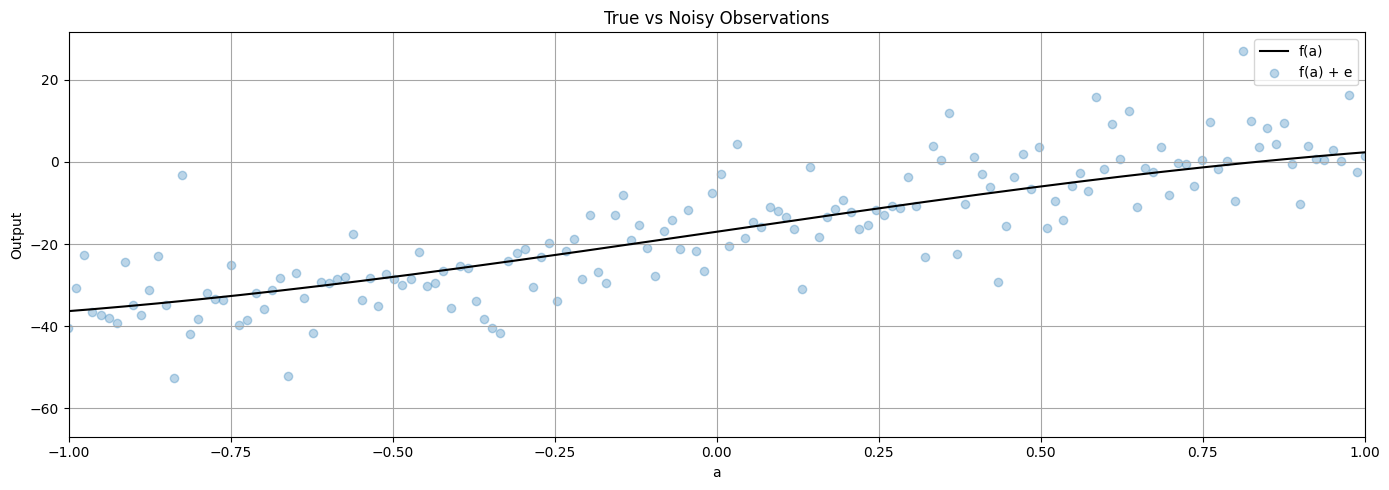

In [4]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))  # Create the figure and axis using subplots
ax.plot(a, l_true, label='f(a)', color='k')  # Line plot for true observations
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)  # Scatter plot for noisy observations

## Setting limits, adding labels, title, and legend

ax.set_xlim([-1, 1])
ax.set_xlabel('a')
ax.set_ylabel('Output')
ax.set_title('True vs Noisy Observations')
ax.grid(True, which='both', ls='-', color='0.65') #adding grid
ax.legend()
fig.tight_layout()

In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              Independent variable (constants)
        l:              Dependent variable (noisy observations)
        P:              Observation weight matrix
        deg:            Degree of polynomial to fit to data
        
    Returns:
        x:              Estimated polynomial coefficients
        cov_x:          Covariance matrix of estimated coefficients
        apv:            Posterior variance factor (goodness of fit)
        v:              Observation residuals
    '''
    # Define the design matrix
    def design_matrix(a, deg):
        n = len(a)  # Use the length of a for the number of observations
        Design_Matrix = np.ones((n, deg + 1))  # Initialize with ones for intercept
        for i in range(1, deg + 1):
            Design_Matrix[:, i] = a ** i  # Fill in powers of 'a'
        return Design_Matrix

    # Create the design matrix
    Design_Matrix = design_matrix(a, deg)
    A = np.fliplr(Design_Matrix)  # Flip to have highest degree term first

    # Calculate the estimated coefficients
    A_T = A.T
    x = np.linalg.inv(A_T @ P @ A) @ (A_T @ P @ l)

    # Calculate the fitted values
    fitted_values = A @ x

    # Calculate residuals
    v = l - fitted_values

    # Calculate residual variance (posterior variance factor)
    n = len(a)
    apv = (v.T @ P @ v) / (n - deg - 1)

    # Calculate the covariance of the estimated coefficients
    cov_x = apv * np.linalg.inv(A_T @ P @ A)

    return x, cov_x, apv, v


In [6]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# Call the fit_polynomial_curve function for polynomial degrees 1, 3, and 5
deg = 1
x_1, cov_x1, apv_1, v_1 = fit_polynomial_curve(a, l, P, deg)

# Fit polynomial of degree 2 (cubic)
deg = 3
x_3, cov_x3, apv_3, v_3 = fit_polynomial_curve(a, l, P, deg)

# Fit polynomial of degree 3 (quintic)
deg = 5
x_5, cov_x5, apv_5, v_5 = fit_polynomial_curve(a, l, P, deg)



In [7]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)
line_uw = np.polyval(x_1, a) #degree 1 polynomial fit
cubic_uw = np.polyval(x_3, a) # Degree 3 polynomial function
quintic_uw = np.polyval(x_5, a) # Degree 5 polynomial function

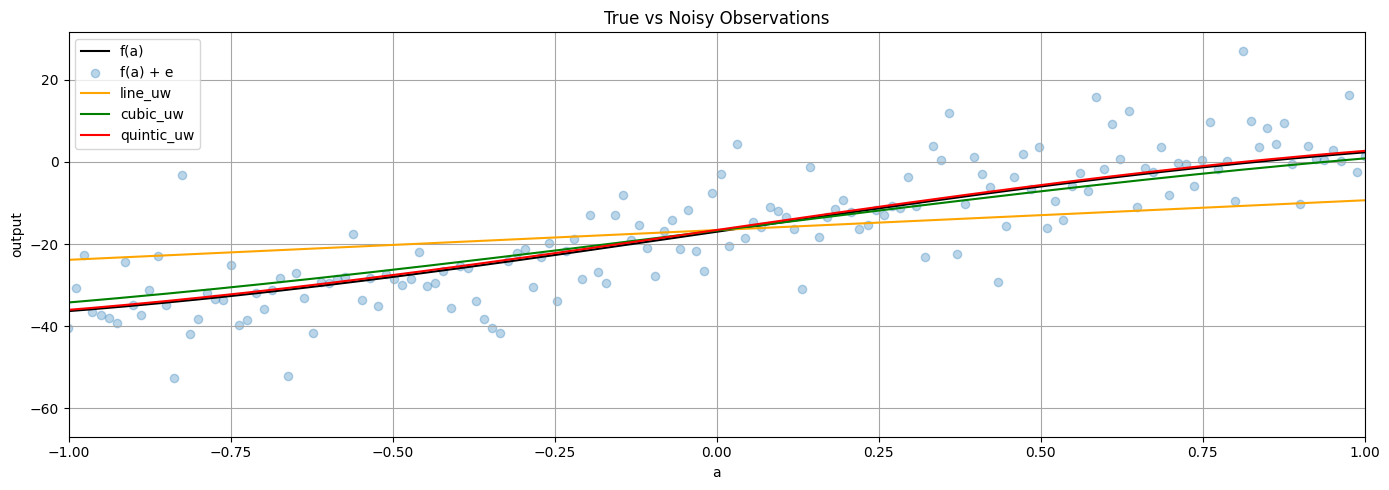

In [8]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))  # Create the figure and axis using subplots
ax.plot(a, l_true, label='f(a)', color='k')  # Line plot for true observations
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)  # Scatter plot for noisy observations

# Plot lines for linear, cubic, and quintic solutions
ax.plot(a, line_uw, color='orange', label='line_uw')
ax.plot(a, cubic_uw, color='green', label='cubic_uw')
ax.plot(a, quintic_uw, color='red', label='quintic_uw')

# Legend, axis labels, and title
ax.set_xlim([-1, 1])
ax.legend()
ax.set_xlabel('a')
ax.set_ylabel('output')
ax.set_title('True vs Noisy Observations')

# Decorative grid lines
ax.grid(True, which='both', linestyle='-', color='0.65')

# Adjust layout for tight spacing
fig.tight_layout()

In [9]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

print(f"A Posteriori Variance Factor for Degree 1 Polynomial: {apv_1}")
print(f"A Posteriori Variance Factor for Degree 3 Polynomial: {apv_3}")
print(f"A Posteriori Variance Factor for Degree 5 Polynomial: {apv_5}")


A Posteriori Variance Factor for Degree 1 Polynomial: 162.742608604322
A Posteriori Variance Factor for Degree 3 Polynomial: 66.13227783131883
A Posteriori Variance Factor for Degree 5 Polynomial: 63.7583446301842


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

residual_1 = l_true - line_uw
norm_1 = np.linalg.norm(residual_1)

residual_3 = l_true - cubic_uw
norm_3 = np.linalg.norm(residual_3)

residual_5 = l_true - quintic_uw
norm_5 = np.linalg.norm(residual_5)

print(f"Norm for Polynomial Degree 1: {norm_1}")
print(f"Norm for Polynomial Degree 3: {norm_3}")
print(f"Norm for Polynomial Degree 5: {norm_5}")

Norm for Polynomial Degree 1: 229.0601679674409
Norm for Polynomial Degree 3: 38.285979929116635
Norm for Polynomial Degree 5: 17.369967196967163


In [11]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# Both APV and norm values decrease as the degree of polynomial increase. A smaller norm and apv indicate a closer fit to the observed data. Here, higher degree polynomials fit the data more closely.

In [12]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

In [13]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...
#step 6 with new weight matrix

new_x_1, new_cov_x1, new_apv_1, new_v_1 = fit_polynomial_curve(a, l, P, 1)

# Fit polynomial of degree 3 (cubic)

new_x_3, new_cov_x3, new_apv_3, new_v_3 = fit_polynomial_curve(a, l, P, 3)

# Fit polynomial of degree 5 (quintic)

new_x_5, new_cov_x5, new_apv_5, new_v_5 = fit_polynomial_curve(a, l, P, 5)

In [14]:
#step 7 with new weight matrix

#degree 1 polynomial fit
new_line_uw = np.polyval(new_x_1, a) 
# Degree 3 polynomial function
new_cubic_uw = np.polyval(new_x_3, a) 
# Degree 5 polynomial function
new_quintic_uw = np.polyval(new_x_5, a) 

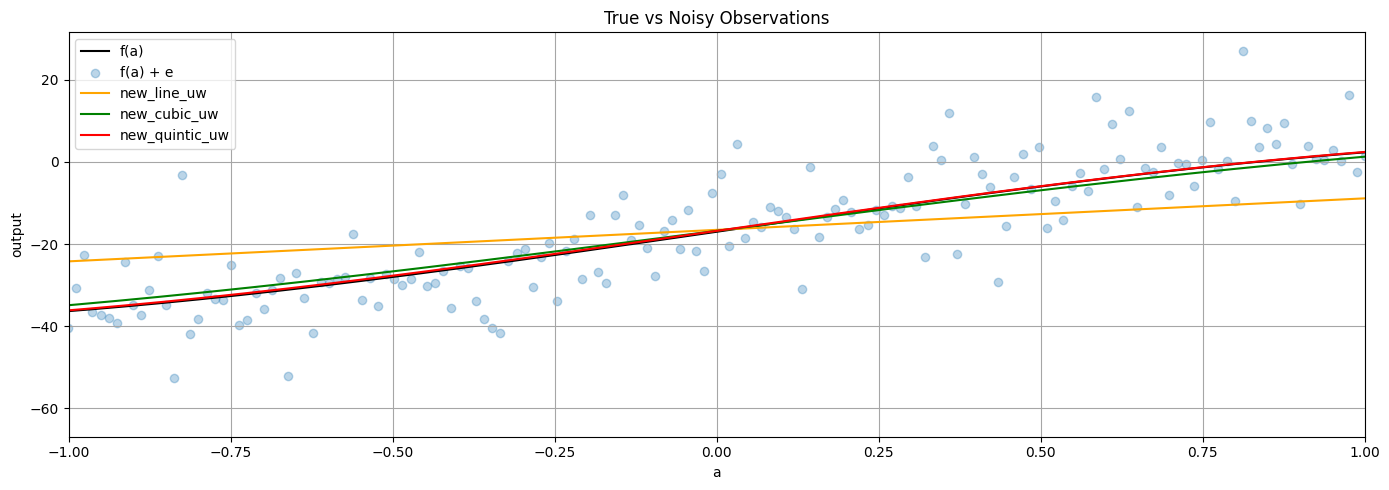

In [15]:
# step 8 with new weight matrix

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))  # Create the figure and axis using subplots
ax.plot(a, l_true, label='f(a)', color='k')  # Line plot for true observations
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)  # Scatter plot for noisy observations

# Plot lines for linear, cubic, and quintic solutions
ax.plot(a, new_line_uw, color='orange', label='new_line_uw')
ax.plot(a, new_cubic_uw, color='green', label='new_cubic_uw')
ax.plot(a, new_quintic_uw, color='red', label='new_quintic_uw')

# Legend, axis labels, and title
ax.legend()
ax.set_xlabel('a')
ax.set_ylabel('output')
ax.set_title('True vs Noisy Observations')
ax.set_xlim([-1, 1])

# Decorative grid lines
ax.grid(True, which='both', linestyle='-', color='0.65')

# Adjust layout for tight spacing
fig.tight_layout()


In [16]:
#step 9 with new weight matrix 

print(f"A Posteriori Variance Factor for Degree 1 Polynomial: {new_apv_1}")
print(f"A Posteriori Variance Factor for Degree 3 Polynomial: {new_apv_3}")
print(f"A Posteriori Variance Factor for Degree 5 Polynomial: {new_apv_5}")


A Posteriori Variance Factor for Degree 1 Polynomial: 12.054651233436903
A Posteriori Variance Factor for Degree 3 Polynomial: 1.1444647026537131
A Posteriori Variance Factor for Degree 5 Polynomial: 0.9447009043856549


In [17]:
# step 10 with new weight matrix
residual_1 = l_true - new_line_uw
norm_1 = np.linalg.norm(residual_1)

residual_3 = l_true - new_cubic_uw
norm_3 = np.linalg.norm(residual_3)

residual_5 = l_true - new_quintic_uw
norm_5 = np.linalg.norm(residual_5)

print(f"Norm for Polynomial Degree 1: {norm_1}")
print(f"Norm for Polynomial Degree 3: {norm_3}")
print(f"Norm for Polynomial Degree 5: {norm_5}")

Norm for Polynomial Degree 1: 230.67760813832948
Norm for Polynomial Degree 3: 36.070266872667965
Norm for Polynomial Degree 5: 5.741606915886233


In [18]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# # step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# Weighted LSE show significantly lower apv factors for each polynomial and reduced norms for higher polynomial degrees compared to unweighted LSE. However both methods yield similar norm values for degree 1.
# The phenomena observed by the difference in apv and norm values is that Weighted LSE is more effective in handling variability in observation errors, which gives a better fit for the predicted data. 

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

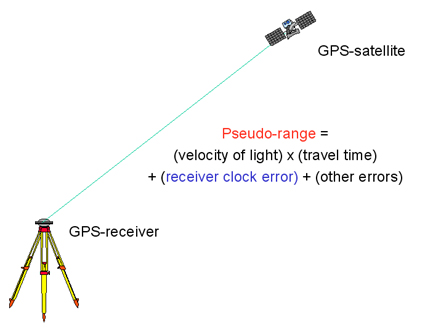

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [19]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudoranges = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudoranges = df_pseudoranges.to_numpy()
sat_pos = df_sat_pos.to_numpy()

print(pseudoranges)
print(sat_pos)

[[7.00000000e+00 2.29197410e+07]
 [8.00000000e+00 2.04598941e+07]
 [1.10000000e+01 2.24003384e+07]
 [1.50000000e+01 2.28291409e+07]
 [1.70000000e+01 2.23420148e+07]
 [1.80000000e+01 2.56464545e+07]
 [1.90000000e+01 2.38147762e+07]
 [2.40000000e+01 2.43113993e+07]
 [2.60000000e+01 2.13536401e+07]
 [2.70000000e+01 2.49716096e+07]
 [2.80000000e+01 2.06389811e+07]]
[[ 7.00000000e+00  5.28079174e+06 -2.55014601e+07  4.64950829e+06]
 [ 8.00000000e+00 -2.15965605e+06 -2.11160248e+07  1.55979092e+07]
 [ 1.10000000e+01  1.03718522e+07 -2.17131113e+07  1.05586870e+07]
 [ 1.50000000e+01 -1.60857608e+07  4.28507122e+06  2.07420421e+07]
 [ 1.70000000e+01 -1.43129881e+07 -2.20450143e+07  4.67120840e+06]
 [ 1.80000000e+01 -2.43571819e+06  1.62572051e+07  2.10997795e+07]
 [ 1.90000000e+01  1.59124672e+07 -3.46251531e+06  2.10536283e+07]
 [ 2.40000000e+01  1.62718482e+07 -2.18766320e+05  2.10353327e+07]
 [ 2.60000000e+01 -1.92470355e+07 -7.25980368e+06  1.64729819e+07]
 [ 2.70000000e+01 -1.59311520e+07

In [20]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudoranges.shape[0]
m = 3

In [21]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [22]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [23]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])


In [24]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.zeros(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [25]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, sat_pos):
    difference = sat_pos - receiver_pos
    distance = np.sqrt(np.sum(difference ** 2, axis=1))
    return distance


In [26]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(receiver_pos, sat_pos, rho):
    # Calculate the difference between satellite positions and receiver position
    difference = sat_pos - receiver_pos
    
    # Compute the partial derivatives for each satellite
    A = np.zeros((len(rho), 3))  # Initialize the design matrix A with shape (n, 3)
    
    for i in range(len(rho)):
        # Calculate the gradient for the ith satellite
        if rho[i] != 0:  # Avoid division by zero
            A[i, 0] = (difference[i, 0]) / rho[i]  # Partial derivative with respect to x
            A[i, 1] = (difference[i, 1]) / rho[i]  # Partial derivative with respect to y
            A[i, 2] = (difference[i, 2]) / rho[i]  # Partial derivative with respect to z

    return A

In [27]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
def least_squares_estimation():
    # Initialize arrays to store results
    arr_w = []
    arr_delta = []
    arr_err_pos = []
    arr_i = []
    x_hat = x_0.copy()

    # Initialize variables
    delta = np.ones(3)  # Initialize delta
    convergence_criteria = np.linalg.norm(delta) < 0.001  # Check initial convergence
    max_iterations = 100
    i = 0  # Initialize iteration counter

    # Initialize placeholders for final results
    w = None
    err_pos = None
    apv = None
    C_x_hat = None

    # Least Squares Estimation (LSE) function
    while not convergence_criteria and i < max_iterations:
        # Compute the geometric distance
        rho = euclidean_norm(x_hat, sat_pos[:, 1:4])

        # Compute the design matrix A
        A = design_matrix(x_hat, sat_pos[:, 1:4], rho)

        # Compute the misclosure array w
        w = pseudoranges[:, 1] - rho

        # Check if the design matrix is singular
        if np.linalg.matrix_rank(A) < A.shape[0]:
            print("Design matrix A is singular.")
            break  # Exit the loop if A is singular

        # Compute the corrections delta with regularization
        lambda_reg = 1e-10  # Regularization factor
        delta = np.linalg.inv(A.T @ P @ A + lambda_reg * np.eye(A.shape[1])) @ (A.T @ P @ w)

        # Update the states
        x_hat += delta

        # Compute the position error from using the updated states against groundtruth
        err_pos = x_hat - GroundTruth

        # Update the counter
        i += 1

        # Store the misclosure, delta, position error, and counter from each iteration
        arr_w.append(w)
        arr_delta.append(delta)
        arr_err_pos.append(err_pos)
        arr_i.append(i)

        # Check for convergence again
        convergence_criteria = np.all(np.abs(delta) < 0.001)

    # After the loop, compute the A Posteriori Variance of Unit Weight only if we didn't break due to singular A
    if w is not None and i < max_iterations:
        apv = (w.T @ P @ w) / (n - m)
        # Compute the Covariance matrix of estimated states
        C_x_hat = apv * np.linalg.inv(A.T @ P @ A)
    else:
        apv = None
        C_x_hat = None

    print(f"Final Iteration {i}: delta norm = {np.linalg.norm(delta)}")
    return w, delta, err_pos, x_hat, apv, C_x_hat, arr_w, arr_delta, arr_err_pos, arr_i

w, delta, err_pos, x_hat, apv, C_x_hat, arr_w, arr_delta, arr_err_pos, arr_i = least_squares_estimation()

Design matrix A is singular.
Final Iteration 0: delta norm = 1.7320508075688772


In [28]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""

# (7 marks)
print("\nEstimated States (Receiver Position)", x_hat)
print(arr_delta)
print(arr_err_pos)
print ("\nCorrections Array (Delta)", delta)

print("\nEstimated Measurements Residuals (Misclosure):", w)  # Misclosure array

print("\nA Posteriori Variance of Unit Weight:", apv)  # A posteriori variance

print("\nCovariance Matrix of Estimated States:", C_x_hat)  # Covariance matrix of estimated states

print("\nNumber of Iterations:", i)  # Number of iterations

print("\n3-D Position Errors (Error from Ground Truth):", err_pos)  # Position error compared to ground truth


Estimated States (Receiver Position) [0. 0. 0.]
[]
[]

Corrections Array (Delta) [1. 1. 1.]

Estimated Measurements Residuals (Misclosure): [-3534543.32140303 -5881051.00917708 -3877416.30446588 -3766833.34553794
 -4353761.43463428 -1101071.29806546 -2801964.48121247 -2283828.13684117
 -4999960.35362056 -1968296.47568328 -6343828.97100315]

A Posteriori Variance of Unit Weight: 22331947653456.42

Covariance Matrix of Estimated States: [[9.10261783e+12 7.06030311e+11 1.37914388e+12]
 [7.06030311e+11 6.07966974e+12 1.31478331e+12]
 [1.37914388e+12 1.31478331e+12 5.35841388e+12]]

Number of Iterations: 0

3-D Position Errors (Error from Ground Truth): None


In [29]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
# The posterior variance of unit weight value is value indicates how well the observations fit the model after the least squares estimation.
# This value provides an estimate of the uncertainty associated with the measurements. 
# A value close to 1 suggests a good fit, while a value much larger than 1 indicates the model's variance may be underestimated or the data have outliers.
# Therefore, our computed value indicates that the model's varance is underestimated or may indicate the precesce of outliers in the data. 

# he covariance matrix provides insight into the uncertainty in the estimated receiver's position. 
# The diagonal elements represent the variances (i.e., uncertainties) in each coordinate (x, y, z), while off-diagonal elements represent correlations between the states. 
# Smaller values indicate higher confidence in the estimation.The Covariance matrix of estimated states indicates the degree of uncertainty in each state parameter and their correlations.
# Based off our values, the model has moderate or low reliability. The variances are high, especially for state 1 and 3. While state 2 has lower variance, all three states have values greater than 1,
# which may reflect issues with the model fit or measurements.

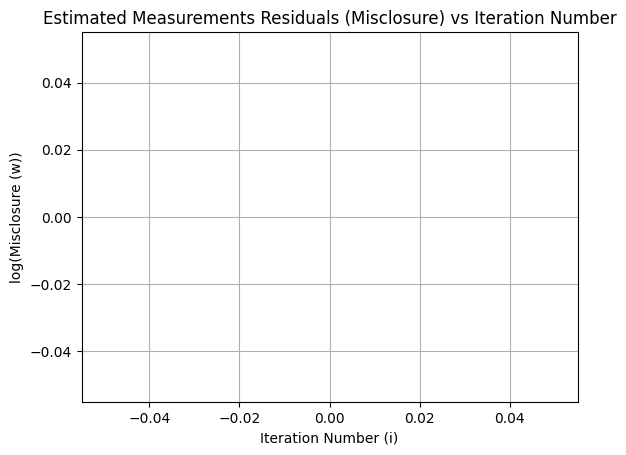

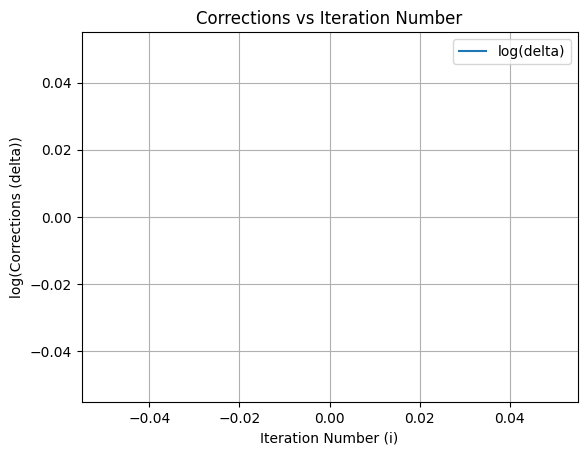

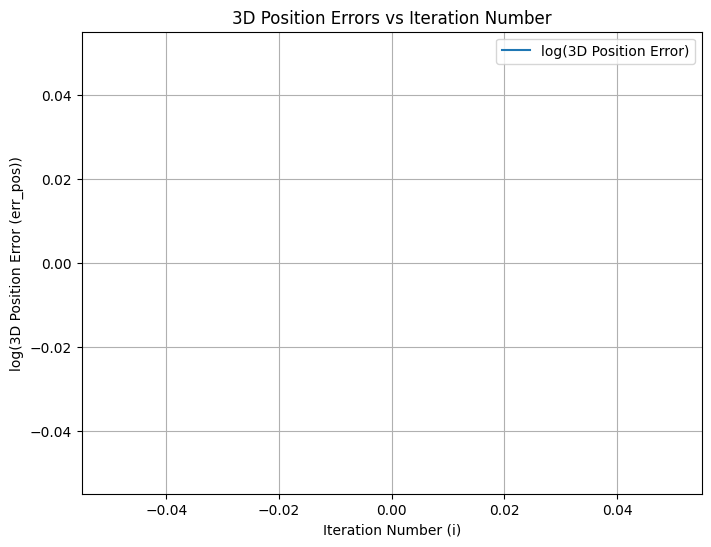

In [30]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.plot(arr_i, np.log(np.abs(arr_w)), label='log(w)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('log(Misclosure (w))')
plt.title('Estimated Measurements Residuals (Misclosure) vs Iteration Number')
plt.grid(True)
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='log(delta)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('log(Corrections (delta))')
plt.title('Corrections vs Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(8, 6))
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='log(3D Position Error)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('log(3D Position Error (err_pos))')
plt.title('3D Position Errors vs Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [32]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
